<a href="https://colab.research.google.com/github/Qaiserfarooq285/Labtasks/blob/main/actualvsconrounded.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Required **Packages**

In [109]:
!pip install highway-env stable-baselines3[extra] --quiet

# **imports**

In [110]:
import gymnasium as gym
import highway_env
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import DQN
import os
from PIL import Image
from IPython.display import display, Image as IPImage

# **Environment Configuration**

In [111]:
config = {
    "screen_width": 600,
    "screen_height": 600,
    "scaling": 5.5,
    "lanes_count": 2,  # 🔧 Change number of lanes here
    "vehicles_count": 40,  # 🔧 Change number of cars here
    "duration": 80,
    "simulation_frequency": 15,
    "policy_frequency": 5,
    "other_vehicles_type": "highway_env.vehicle.behavior.IDMVehicle",
    "offscreen_rendering": True,
    "render_agent": True,
    "reward_speed_range": [0, 0.5],
    "normalize_reward": True,
    "collision_reward": -5.0,       # Harsh penalty for crashing
    "right_lane_reward": 0.2,
    "high_speed_reward": 0.5,
    "lane_change_reward": -0.1,
}

env = gym.make("intersection-v0", render_mode="rgb_array", config=config)
obs, _ = env.reset()

# **Train DQN Agent**

In [112]:
model = DQN(
    "MlpPolicy",
    env,
    policy_kwargs={"net_arch": [256, 256]},
    verbose=1,
    learning_rate=5e-4,
    buffer_size=10000,
    learning_starts=100,
    batch_size=32,
    gamma=0.8,
    train_freq=1,
    target_update_interval=50,
)

model.learn(total_timesteps=10000)
model.save("dqn_highway_model")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 51.5     |
|    ep_rew_mean      | 46.6     |
|    exploration_rate | 0.804    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 15       |
|    time_elapsed     | 12       |
|    total_timesteps  | 206      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.00893  |
|    n_updates        | 105      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 55       |
|    ep_rew_mean      | 49.7     |
|    exploration_rate | 0.582    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 19       |
|    time_elapsed     | 22       |
|    total_timesteps  | 440      |
| train/              |        

# Generate Actual Agent Trajectory GIF

In [113]:
frames_actual = []
obs, _ = env.reset()
done = False
while not done:
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    frame = env.render()
    frames_actual.append(Image.fromarray(frame))

actual_gif_path = "actual_trajectory.gif"
frames_actual[0].save(
    actual_gif_path,
    save_all=True,
    append_images=frames_actual[1:],
    duration=100,
    loop=0
)
print(f"✅ Actual Agent Trajectory Saved: {actual_gif_path}")

✅ Actual Agent Trajectory Saved: actual_trajectory.gif


# **Actual trajectory**

🎯 Actual Agent Trajectory:


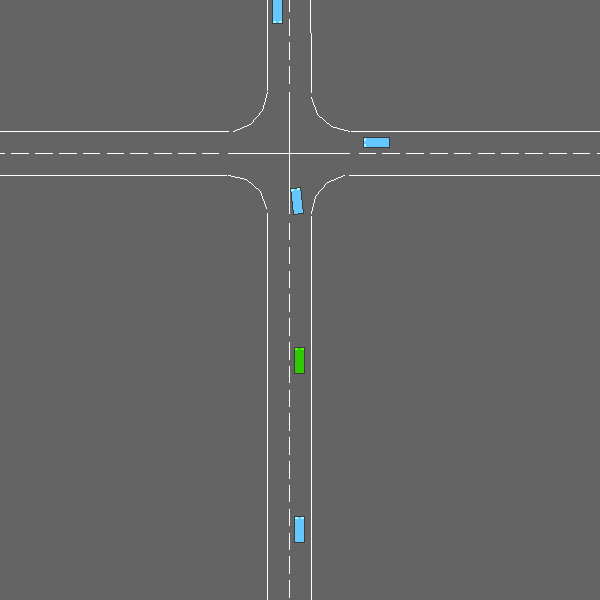

In [114]:
print("🎯 Actual Agent Trajectory:")
display(IPImage(filename=actual_gif_path))

✅ Actual Agent Trajectory Saved: actual_trajectory.gif


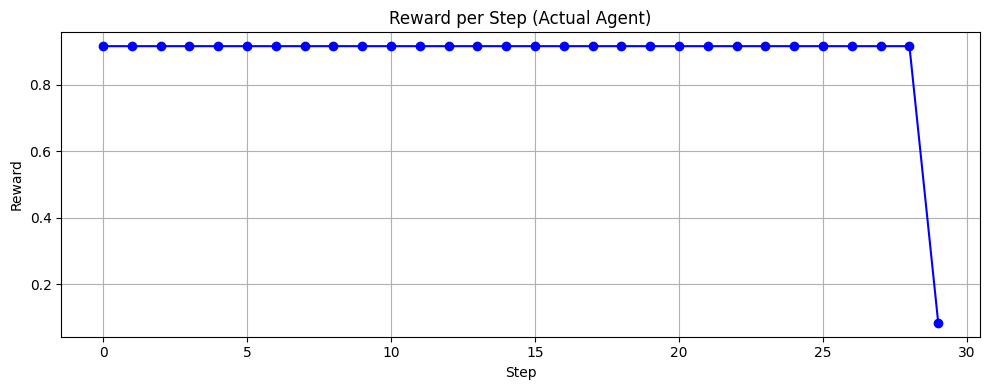

In [115]:
import matplotlib.pyplot as plt

frames_actual = []
rewards = []  # Track rewards at each step

obs, _ = env.reset()
done = False
step = 0

while not done:
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    frame = env.render()

    frames_actual.append(Image.fromarray(frame))
    rewards.append(reward)

    step += 1

# Save trajectory as GIF
actual_gif_path = "actual_trajectory.gif"
frames_actual[0].save(
    actual_gif_path,
    save_all=True,
    append_images=frames_actual[1:],
    duration=100,
    loop=0
)

print(f"✅ Actual Agent Trajectory Saved: {actual_gif_path}")

# Plot the reward graph
plt.figure(figsize=(10, 4))
plt.plot(rewards, marker='o', linestyle='-', color='blue')
plt.title("Reward per Step (Actual Agent)")
plt.xlabel("Step")
plt.ylabel("Reward")
plt.grid(True)
plt.tight_layout()
plt.show()


# **Generate Counterfactual Agent Trajectory GIF**

In [116]:
frames_random = []
obs, _ = env.reset()
done = False
while not done:
    action = env.action_space.sample()  # Random action
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    frame = env.render()
    frames_random.append(Image.fromarray(frame))

random_gif_path = "random_trajectory.gif"
frames_random[0].save(
    random_gif_path,
    save_all=True,
    append_images=frames_random[1:],
    duration=100,
    loop=0
)
print(f"✅ Counterfactual Agent Trajectory Saved: {random_gif_path}")

✅ Counterfactual Agent Trajectory Saved: random_trajectory.gif


# **Counterfactual Trajactory**

🎲 Counterfactual Agent Trajectory:


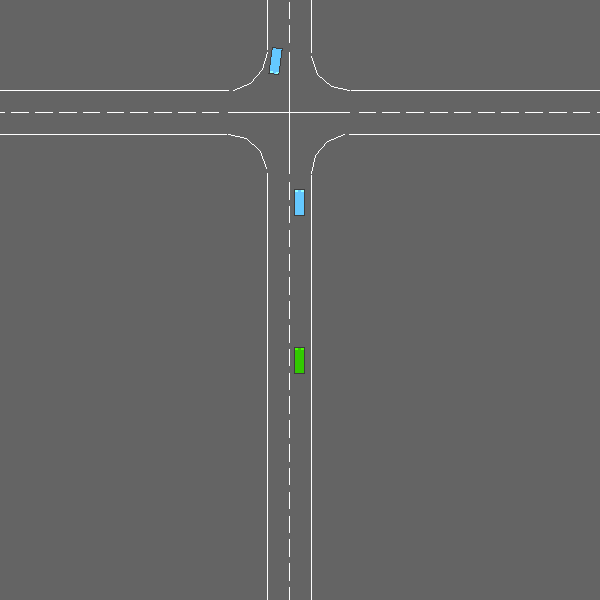

In [117]:
print("🎲 Counterfactual Agent Trajectory:")
display(IPImage(filename=random_gif_path))

✅ Counterfactual Agent Trajectory Saved: random_trajectory.gif


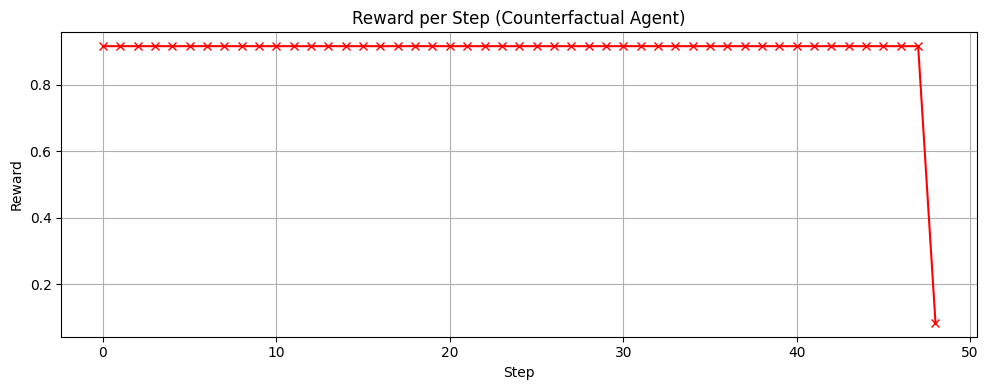

In [118]:
import matplotlib.pyplot as plt

# Random agent trajectory and reward collection
frames_random = []
rewards_random = []

obs, _ = env.reset()
done = False

while not done:
    action = env.action_space.sample()  # Random action
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    frame = env.render()

    frames_random.append(Image.fromarray(frame))
    rewards_random.append(reward)

# Save the random agent trajectory as a GIF
random_gif_path = "random_trajectory.gif"
frames_random[0].save(
    random_gif_path,
    save_all=True,
    append_images=frames_random[1:],
    duration=100,
    loop=0
)
print(f"✅ Counterfactual Agent Trajectory Saved: {random_gif_path}")

# Plot reward per step for the random agent
plt.figure(figsize=(10, 4))
plt.plot(rewards_random, marker='x', linestyle='-', color='red')
plt.title("Reward per Step (Counterfactual Agent)")
plt.xlabel("Step")
plt.ylabel("Reward")
plt.grid(True)
plt.tight_layout()
plt.show()


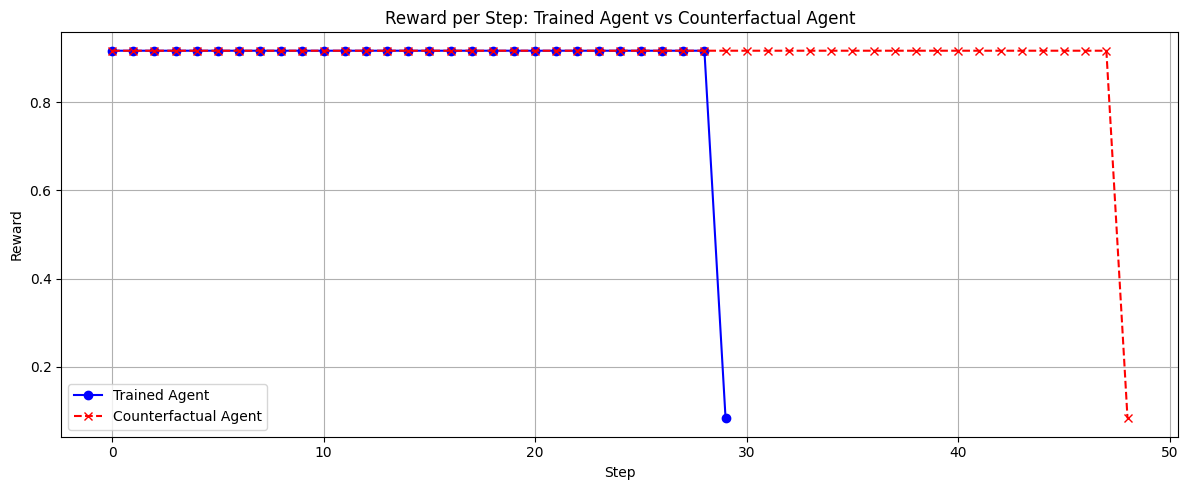

In [119]:
import matplotlib.pyplot as plt

# Ensure both reward lists exist: rewards (trained), rewards_random (random)
plt.figure(figsize=(12, 5))

# Plot trained agent
plt.plot(rewards, label="Trained Agent", color="blue", marker='o', linestyle='-')

# Plot random agent
plt.plot(rewards_random, label="Counterfactual Agent", color="red", marker='x', linestyle='--')

# Add titles and labels
plt.title("Reward per Step: Trained Agent vs Counterfactual Agent")
plt.xlabel("Step")
plt.ylabel("Reward")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
